In [1]:
using Plots
using Random

function phase_portrait_simulation()
    """
    ФАЗОВЫЙ ПОРТРЕТ ИМИТАЦИОННОГО МОДЕЛИРОВАНИЯ
    """
    # Параметры модели
    ε1, ε2 = 0.7, 0.3
    T = 2000
    dt = 0.01

    # Различные начальные условия для построения фазового портрета
    initial_conditions = [
        [0.1, 0.1], [0.8, 0.1], [0.1, 0.8],
        [0.4, 0.4], [0.7, 0.2], [0.2, 0.7]
    ]

    colors = [:blue, :red, :green, :orange, :purple, :brown]

    p = plot(size=(800, 600), dpi=300)

    Random.seed!(42)

    for (i, u0) in enumerate(initial_conditions)
        # Имитационное моделирование
        u1, u2 = copy(u0)
        u1_hist = [u1]
        u2_hist = [u2]

        for t in 1:T
            # Детерминистическая часть
            du1 = u1 * (1 - u1 - ε1 * u2) * dt
            du2 = u2 * (1 - u2 - ε2 * u1) * dt

            # Стохастическая часть
            noise1 = 0.02 * sqrt(dt) * randn()
            noise2 = 0.02 * sqrt(dt) * randn()

            u1 = max(0.0, u1 + du1 + noise1)
            u2 = max(0.0, u2 + du2 + noise2)

            push!(u1_hist, u1)
            push!(u2_hist, u2)
        end

        # Построение фазовой траектории
        plot!(p, u1_hist, u2_hist,
              linewidth=2,
              color=colors[i],
              label="N₁(0)=$(u0[1]), N₂(0)=$(u0[2])",
              alpha=0.8)

        # Начальная точка
        scatter!(p, [u1_hist[1]], [u2_hist[1]],
                color=colors[i],
                markersize=5,
                label="")

        # Конечная точка
        scatter!(p, [u1_hist[end]], [u2_hist[end]],
                color=colors[i],
                markersize=7,
                marker=:square,
                label="")
    end

    # Настройка графика
    plot!(p,
          xlabel="Численность вида 1, N₁",
          ylabel="Численность вида 2, N₂",
          title="Фазовый портрет имитационного моделирования",
          titlefontsize=14,
          legend=:topright,
          legendfontsize=10,
          grid=true,
          gridalpha=0.3,
          framestyle=:box)

    # Аннотации
    annotate!(p, 0.1, 0.9, text("ε₁ = $ε1, ε₂ = $ε2", 12, :black, :left))
    annotate!(p, 0.1, 0.8, text("◼ - конечные состояния", 10, :black, :left))

    # Настройка осей
    plot!(p, xlims=(0, 1.0), ylims=(0, 1.0))

    return p
end

# Генерация фазового портрета
phase_plot = phase_portrait_simulation()

# Сохранение
savefig(phase_plot, "phase_portrait_simulation.png")

println("ФАЗОВЫЙ ПОРТРЕТ ИМИТАЦИОННОГО МОДЕЛИРОВАНИЯ СОЗДАН!")
println("Сохранен как: phase_portrait_simulation.png")

ФАЗОВЫЙ ПОРТРЕТ ИМИТАЦИОННОГО МОДЕЛИРОВАНИЯ СОЗДАН!
Сохранен как: phase_portrait_simulation.png


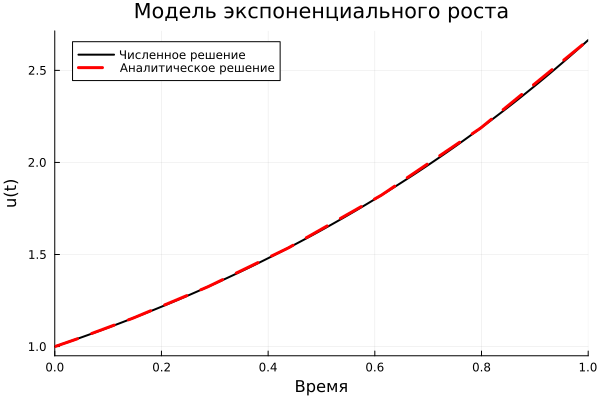

In [3]:
# задаём точность решения:
sol = solve(prob,abstol=1e-8,reltol=1e-8)
# строим график:
plot(sol, lw=2, color="black", title="Модель экспоненциального роста", xaxis="Время",yaxis="u(t)",label="Численное решение")
plot!(sol.t, t->1.0*exp(a*t),lw=3,ls=:dash,color="red",label="Аналитическое решение")

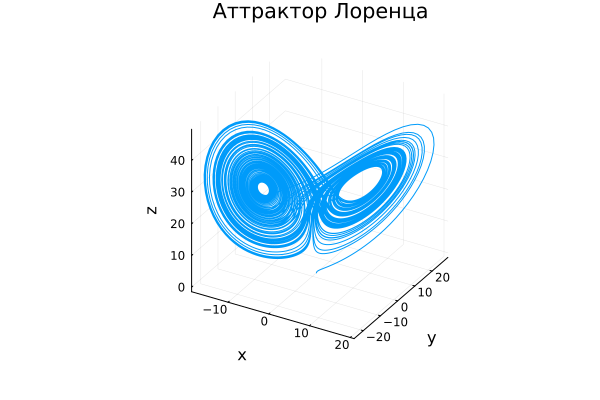

In [4]:
# Задаём описание модели
function lorenz!(du, u, p, t)
    σ, ρ, β = p
    du[1] = σ * (u[2] - u[1])
    du[2] = u[1] * (ρ - u[3]) - u[2]
    du[3] = u[1] * u[2] - β * u[3]
end
# Задаём начальное условие
u0 = [1.0, 0.0, 0.0]
# Задаём значения параметров
p = (10, 28, 8 / 3)
# Задаём интервал времени
tspan = (0.0, 100.0)
# Решение
prob = ODEProblem(lorenz!, u0, tspan, p)
sol = solve(prob, Tsit5())
# Строим график
plot(sol, idxs=(1, 2, 3), lw=1, title="Аттрактор Лоренца", xaxis="x", yaxis="y", zaxis="z", legend=false)

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


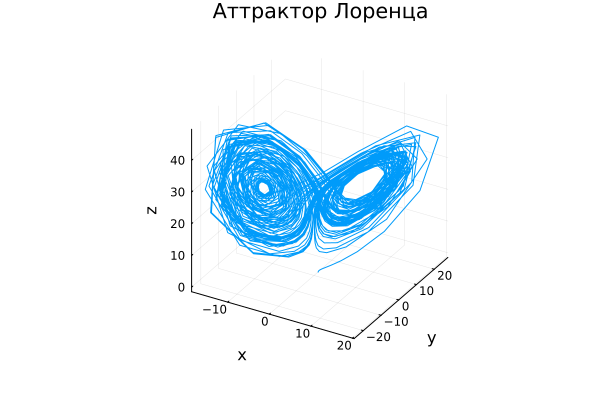

In [5]:
plot(sol,vars=(1,2,3),denseplot=false, lw=1, title="Аттрактор Лоренца", xaxis="x",yaxis="y", zaxis="z", legend=false)


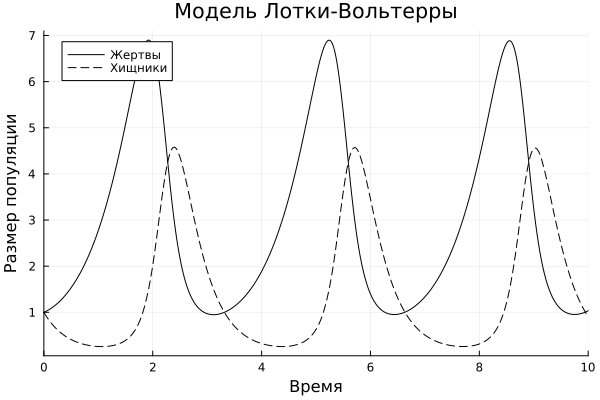

In [6]:
# Определяем модель Лотки-Вольтерры
function lotka_volterra!(du, u, p, t)
    x, y = u
    a, b, c, d = p
    du[1] = a * x - b * x * y  # Уравнение для жертв
    du[2] = -c * y + d * x * y  # Уравнение для хищников
end
# Начальные условия
u0 = [1.0, 1.0]  # начальные популяции жертв и хищников
# Параметры модели
p = [1.5, 1.0, 3.0, 1.0]  # a, b, c, d
# Интервал времени
tspan = (0.0, 10.0)
# Создаём задачу
prob = ODEProblem(lotka_volterra!, u0, tspan, p)
# Решаем задачу
sol = solve(prob, Tsit5())
# Построение графика
plot(sol, label=["Жертвы" "Хищники"], color="black",
     linestyle = [:solid :dash], title="Модель Лотки-Вольтерры",
     xlabel="Время", ylabel="Размер популяции")

[ Info: Saved animation to C:\Users\konno\work\study\2025\science_2025-2026\malthus_population_growth.gif


Plots.AnimatedGif("C:\\Users\\konno\\work\\study\\2025\\science_2025-2026\\malthus_population_growth.gif")
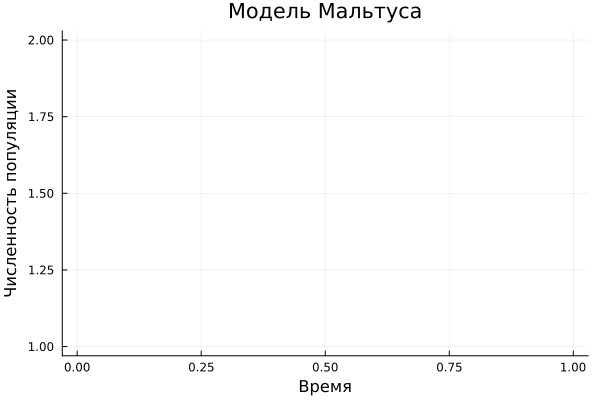

In [7]:
# Определение параметров
b = 1.0
c = 0.2
a = b - c
u0 = 1.0  # Начальная численность популяции
tspan = (0.0, 10.0)  # Интервал времени
# Описание модели
f(u, p, t) = a * u  # Уравнение роста популяции
# Задаём задачу
prob = ODEProblem(f, u0, tspan)
# Решение задачи
sol = solve(prob)
# Настройка анимации
anim = @animate for i in 1:length(sol.t)
    plot(sol.t[1:i], sol.u[1:i], linewidth=3, title="Модель Мальтуса", xlabel="Время", ylabel="Численность популяции", legend=false)
end
# Сохранение анимации в файл
gif(anim, "malthus_population_growth.gif", fps=15)

[ Info: Saved animation to C:\Users\konno\work\study\2025\science_2025-2026\logistic_growth.gif


Plots.AnimatedGif("C:\\Users\\konno\\work\\study\\2025\\science_2025-2026\\logistic_growth.gif")
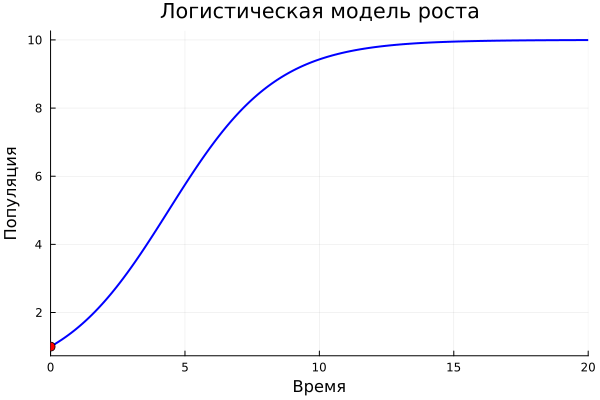

In [8]:
# Определение модели
function logistic!(du, u, p, t)
    r, k = p
    du[1] = r * u[1] * (1 - u[1] / k)
end
# Начальные условия
u0 = [1.0]  # Начальная численность популяции
# Параметры
r = 0.5  # Коэффициент роста
k = 10.0  # Емкость экосистемы
p = (r, k)
# Интервал времени
tspan = (0.0, 20.0)
# Решение
prob = ODEProblem(logistic!, u0, tspan, p)
sol = solve(prob, Tsit5())  # Используем Tsit5 для не-жёсткой задачи
# Создание объекта анимации
anim = Animation()
# Построение анимации
for t in 0:0.5:20
    plot(sol, vars=(0, 1), linewidth=2, color=:blue, title="Логистическая модель роста",
         xlabel="Время", ylabel="Популяция", legend=false)
    scatter!([t], [sol(t)[1]], color=:red, label="", markersize=5)  # Добавляем текущую точку
    frame(anim)  # Добавляем кадр в анимацию
end
# Сохранение анимации
gif(anim, "logistic_growth.gif", fps=10)  # Сохраняем анимацию в файл

[ Info: Saved animation to C:\Users\konno\work\study\2025\science_2025-2026\sir_model_animation.gif


Plots.AnimatedGif("C:\\Users\\konno\\work\\study\\2025\\science_2025-2026\\sir_model_animation.gif")
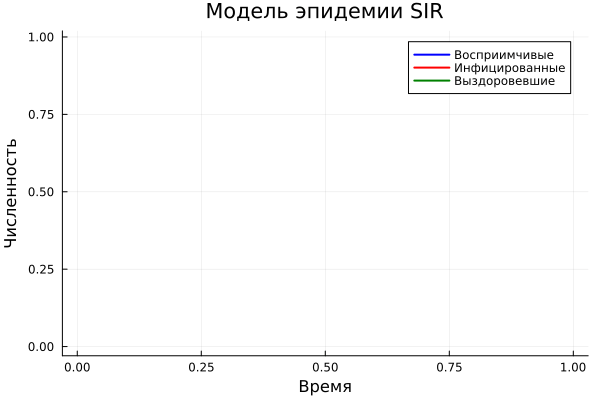

In [9]:
# Определение модели
function sir!(du, u, p, t)
    β, ν = p
    s, i, r = u
    du[1] = -β * s * i          # Восприимчивые
    du[2] = β * s * i - ν * i   # Инфицированные
    du[3] = ν * i               # Выздоровевшие
end
# Начальные условия
u0 = [0.99, 0.01, 0.0]  # 99% восприимчивых, 1% инфицированных
# Параметры
β = 0.3  # Коэффициент передачи инфекции
ν = 0.1  # Коэффициент выздоровления
p = (β, ν)
# Интервал времени
tspan = (0.0, 100.0)
# Решение
prob = ODEProblem(sir!, u0, tspan, p)
sol = solve(prob, Tsit5())  # Используем Tsit5 для универсального решения
# Создание анимации
anim = @animate for t in 1:length(sol.t)
    plot(sol.t[1:t], [u[1] for u in sol.u[1:t]], label="Восприимчивые", color=:blue, linewidth=2)
    plot!(sol.t[1:t], [u[2] for u in sol.u[1:t]], label="Инфицированные", color=:red, linewidth=2)
    plot!(sol.t[1:t], [u[3] for u in sol.u[1:t]], label="Выздоровевшие", color=:green, linewidth=2)
    title!("Модель эпидемии SIR")
    xlabel!("Время")
    ylabel!("Численность")
end
# Сохранение анимации
gif(anim, "sir_model_animation.gif", fps=120)

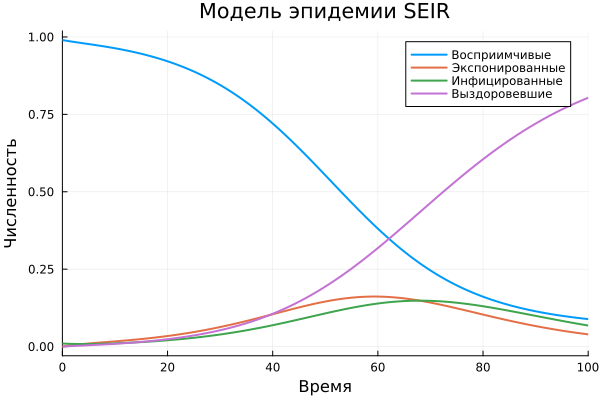

In [10]:
# Определение модели
function seir!(du, u, p, t)
    β, δ, γ, N = p
    s, e, i, r = u
    du[1] = -β * s * i / N        # Восприимчивые
    du[2] = β * s * i / N - δ * e # Экспонированные
    du[3] = δ * e - γ * i         # Инфицированные
    du[4] = γ * i                 # Выздоровевшие
end
# Начальные условия
u0 = [0.99, 0.0, 0.01, 0.0]  # 99% восприимчивых, 1% инфицированных
# Параметры
β = 0.3  # Коэффициент передачи инфекции
δ = 0.1  # Параметр инкубационного периода
γ = 0.1  # Коэффициент выздоровления
N = 1.0  # Общая численность населения
p = (β, δ, γ, N)
# Интервал времени
tspan = (0.0, 100.0)
# Решение
prob = ODEProblem(seir!, u0, tspan, p)
sol = solve(prob, Tsit5())  # Используем Tsit5 для не-жёстких задач
# Построение графика
plot(sol, label=["Восприимчивые" "Экспонированные" "Инфицированные" "Выздоровевшие"],
     title="Модель эпидемии SEIR", xlabel="Время", ylabel="Численность", linewidth=2)

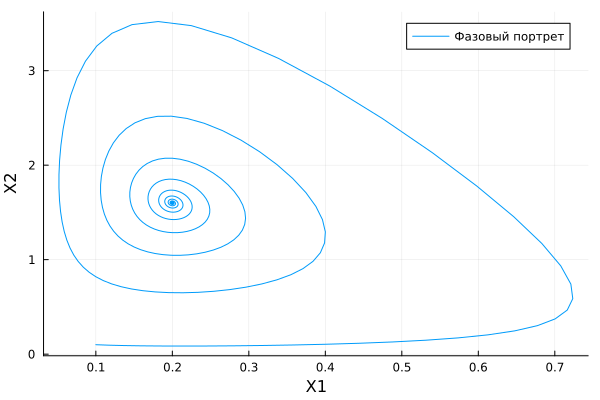

In [11]:
# Параметры модели
a = 2
c = 1
d = 5
# Численные методы для дискретной модели
function lotka_volterra!(X, p)
    a, c, d = p
    x1, x2 = X
    dx1 = a * x1 * (1 - x1) - x1 * x2
    dx2 = -c * x2 + d * x1 * x2
    return [dx1, dx2]
end
# Начальные условия
X0 = [0.1, 0.1]  # начальные значения X1 и X2
# Время и шаг
T = 100
dt = 0.1
times = 0:dt:T
# Массивы для численного решения
X = zeros(length(times), 2)
X[1, :] = X0
# Численное решение
for i in 2:length(times)
    X[i, :] = X[i-1, :] + dt * lotka_volterra!(X[i-1, :], (a, c, d))
end
# Построение фазового портрета
plot(X[:, 1], X[:, 2], label="Фазовый портрет", xlabel="X1", ylabel="X2")

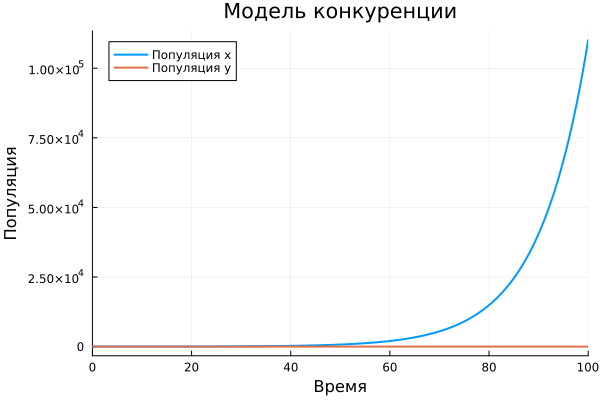

In [12]:
# Модель конкуренции
function competition!(du, u, p, t)
    α, β = p
    x, y = u
    du[1] = α * x - β * x * y
    du[2] = α * y - β * x * y
end
# Начальные условия
u0 = [10.0, 5.0]  # Начальные популяции
# Параметры
α = 0.1
β = 0.01
p = (α, β)
# Интервал времени
tspan = (0.0, 100.0)
# Решение
prob = ODEProblem(competition!, u0, tspan, p)
sol = solve(prob, Tsit5())
# Построение графиков
plot(sol, label=["Популяция x" "Популяция y"], title="Модель конкуренции", xlabel="Время", ylabel="Популяция", linewidth=2)

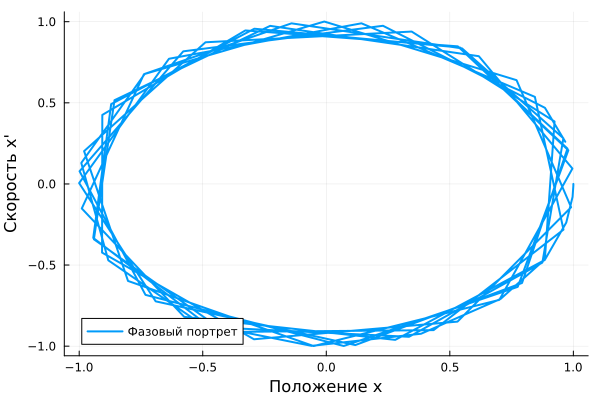

In [14]:
# Модель гармонического осциллятора
function harmonic_oscillator!(du, u, p, t)
    ω0 = p[1]  # циклическая частота
    du[1] = u[2]  # x' = y
    du[2] = -ω0^2 * u[1]  # y' = -ω0^2 * x
end
# Начальные условия
x0 = 1.0    # Начальное положение (м)
y0 = 0.0    # Начальная скорость (м/с)
u0 = [x0, y0]  # Начальные значения: x0 и y0
# Параметры
ω0 = 1.0    # Циклическая частота (рад/с)
p = [ω0]    # Параметры системы
# Интервал времени
tspan = (0.0, 50.0)
# Создание задачи для решения
prob = ODEProblem(harmonic_oscillator!, u0, tspan, p)
# Решение задачи
sol = solve(prob, Tsit5())
# Построение графиков (положение и скорость от времени)
plot(sol, label=["Положение x" "Скорость x'"], title="Гармонический осциллятор", xlabel="Время (t)", ylabel="Значение", linewidth=2)
# Построение фазового портрета (x, x')
plot(sol[1, :], sol[2, :], label="Фазовый портрет", xlabel="Положение x", ylabel="Скорость x'", linewidth=2)

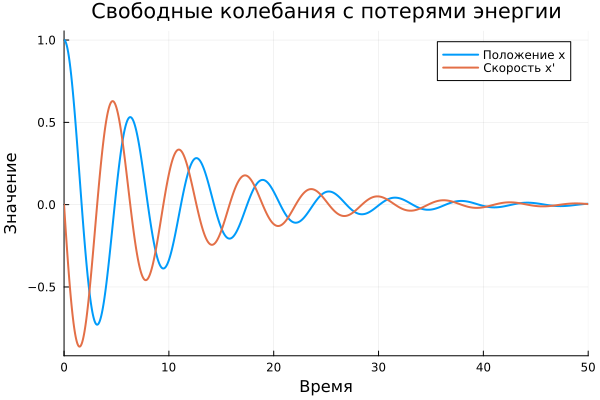

In [15]:
# Модель свободных колебаний с потерями
function damped_oscillator!(du, u, p, t)
    γ, ω0 = p
    du[1] = u[2]
    du[2] = -2 * γ * u[2] - ω0^2 * u[1]
end
# Начальные условия
u0 = [1.0, 0.0]  # Начальное положение и скорость
# Параметры
γ = 0.1
ω0 = 1.0
p = (γ, ω0)
# Интервал времени
tspan = (0.0, 50.0)
# Решение
prob = ODEProblem(damped_oscillator!, u0, tspan, p)
# Используем более подходящий алгоритм, например, Tsit5
sol = solve(prob, Tsit5())
# Построение графиков
plot(sol, label=["Положение x" "Скорость x'"], title="Свободные колебания с потерями энергии", xlabel="Время", ylabel="Значение", linewidth=2)